In [1]:
import pandas as pd 

In [210]:
import plotly.express as px

In [324]:
import plotly.io as pio

In [ ]:
import country_converter as coco

In [494]:
import chart_studio

In [563]:
df = pd.read_csv('https://query.data.world/s/vcepkrwtvpci6neayomihcirjeq3ay', engine='python', encoding='unicode_escape')

In [707]:
df.head()

,Continent,Sub-Continent,Country,Percentage distribution of women aged 15-49 (per country),Pregnancy intention,Contraceptive availability,Contraceptive method
0,Africa,Eastern Africa,Burundi,0.650838,Not wanting to avoid pregancy,Not applicable,Not applicable
1,Africa,Eastern Africa,Burundi,0.113709,Wanting to avoid pregnancy,Met need,Using modern methods
2,Africa,Eastern Africa,Burundi,0.024347,Wanting to avoid pregnancy,Unmet need,Using traditional methods
3,Africa,Eastern Africa,Burundi,0.211106,Wanting to avoid pregnancy,Unmet need,Using no method
4,Africa,Eastern Africa,Comoros,0.666126,Not wanting to avoid pregancy,Not applicable,Not applicable


In [576]:
def supply_demand(df, country):
    x = df[df.Country==country].groupby(["Pregnancy intention","Contraceptive availability"]).sum()
    x.loc[:,"supply"] = x.loc["Wanting to avoid pregnancy"].unstack().values[0]
    x.loc[:,"demand"] = 1-x.loc["Not wanting to avoid pregancy"].unstack().values[0]
    x.loc[:,"deficit"] = x.demand-x.supply
    x.loc[:,"access"] = x.loc["Wanting to avoid pregnancy"].unstack().values[0]/x.demand
    x.loc[:, "no_access"] = 1-x.access
    x.loc[:, "no_access_"] = np.log(x.access)*(-1)
    x.loc[:,"country"] = country
    return x

In [577]:
def tidy(df):
    tidy = pd.concat([supply_demand(df=df,country=country) for country in df.Country.unique().tolist()])
    tidy.reset_index(inplace=True)
    tidy.drop(tidy.columns[0:3], axis=1, inplace=True)
    tidy.drop_duplicates(inplace=True)
    return tidy

In [578]:
tidy = tidy(df)

In [579]:
tidy.loc[:,"codes"] = coco.convert(names=tidy.country.tolist(), to='ISO3')

In [580]:
tidy[tidy.country=="Burundi"]

,supply,demand,deficit,access,no_access,no_access_,country,codes
0,0.113709,0.349162,0.235453,0.325663,0.674337,1.121891,Burundi,BDI


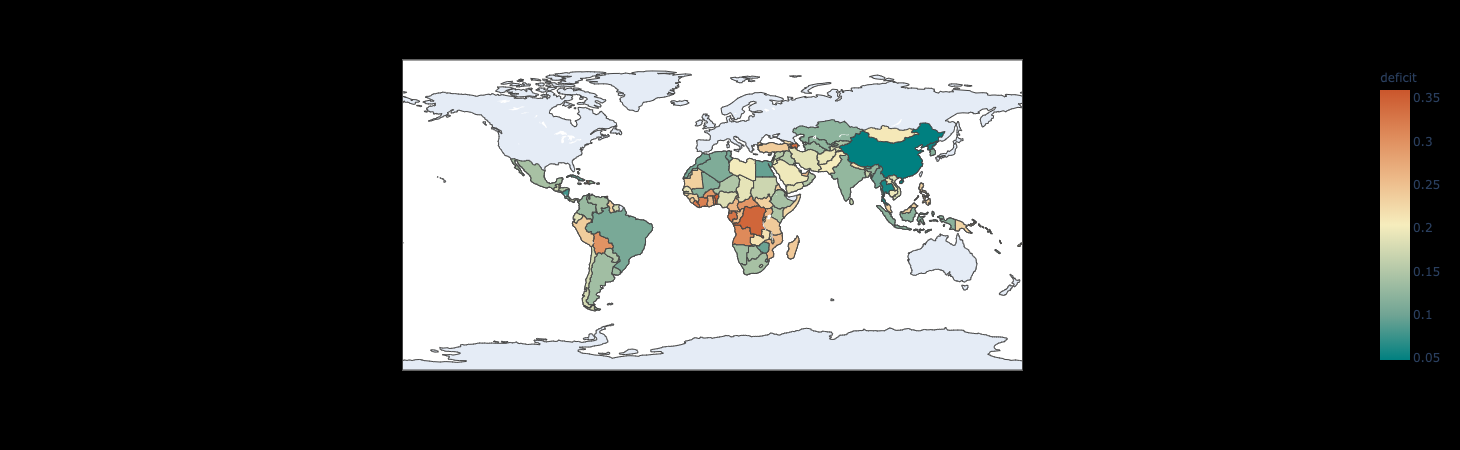

In [587]:
fig = px.choropleth(tidy, locations="codes",
                    color="deficit", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.diverging.Geyser)
fig.update_layout(plot_bgcolor="black", paper_bgcolor="black")
fig.show()

### top 5 countries with biggest contraception deficit - most women in the population can't get modern methods 

In [592]:
tidy.sort_values("deficit", ascending=False)[["country","deficit"]].head(10)

,country,deficit
375,Trinidad and Tobago,0.359253
96,Benin,0.353045
69,Democratic Republic of the Congo,0.343093
261,Azerbaijan,0.337673
75,Gabon,0.328185
120,Liberia,0.324202
105,Côte d'Ivoire,0.317191
78,Sao Tome and Principe,0.313873
141,Togo,0.307499
54,Angola,0.307037


In [597]:
tidy.deficit.describe()

count    148.000000
mean       0.183813
std        0.066015
min        0.047851
25%        0.138239
50%        0.175746
75%        0.230436
max        0.359253
Name: deficit, dtype: float64

In [701]:
fig = px.bar(tidy.sort_values("deficit", ascending=True), x="deficit", y="country", color="no_access", color_continuous_scale=px.colors.diverging.Geyser, \
             orientation='h', hover_name="country", hover_data={"country":False, "no_access":':.0%'})
fig.update_layout(height=1000, font=dict(color="white"))
fig.update_layout(plot_bgcolor="black", paper_bgcolor="black")
fig.update_xaxes(showgrid=False, zeroline=False, showline=False, title_text='Deficit',tickformat=',.0%', fixedrange=True)
fig.update_yaxes(showgrid=False, zeroline=False, showline=False, title_text=None, showticklabels=False, fixedrange=True)
fig.update_layout(coloraxis={"colorbar":dict(tickformat=',.0%', title_text="Relative")})
fig.update_layout(title=dict(text="Women Without Access to Modern Contraception", xanchor='center',yanchor='top', x=.5, y=.97))
fig.show(renderer='iframe')

## supply and demand plot

In [704]:
fig = px.scatter(tidy, x="supply", y="demand", color="deficit", size="no_access_", hover_name="country", hover_data={
#    "supply":False,
#    "demand":False,
    "deficit":':.0%',
    "no_access_": False,
    "no_access":':.0%'
}, color_continuous_scale=px.colors.diverging.Geyser)

fig.update_xaxes(range=[0, 1])
fig.update_yaxes(range=[0, 1])
fig.update_layout(height=1000, font=dict(color="white"))
fig.update_layout(plot_bgcolor="black", paper_bgcolor="black")
fig.update_xaxes(showgrid=False, zeroline=False, showline=False, title_text='Supply',tickformat=',.0%', fixedrange=True)
fig.update_yaxes(showgrid=False, zeroline=False, showline=False, title_text='Demand', tickformat=',.0%', fixedrange=True)
fig.update_layout(coloraxis={"colorbar":dict(tickformat=',.0%', title_text="Deficit")})
fig.update_layout(title=dict(text="Deficit in Modern Contraception for Women", xanchor='center',yanchor='top', x=.5, y=.97))
fig.show(renderer='iframe')

In [705]:
import chart_studio
chart_studio.tools.set_config_file(world_readable=True,
                             sharing='public')

In [706]:
import chart_studio.plotly as py
py.plot(fig)

'https://plotly.com/~polinas123/15/'

In [708]:
!jupyter nbconvert --to html mmv34.ipynb --no-input

[NbConvertApp] Converting notebook mmv34.ipynb to html
[NbConvertApp] Writing 295667 bytes to mmv34.html
